In [43]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [19]:
url ='https://fantasy.premierleague.com/api/bootstrap-static/'

In [20]:
r = requests.get(url)

In [21]:
json = r.json()

In [22]:
json.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

In [23]:
elements_df = pd.DataFrame(json['elements']) #Creating data frame for element
elements_types_df = pd.DataFrame(json['element_types'])
teams_df = pd.DataFrame(json['teams'])

In [24]:
elements_df.head()

chance_of_playing_next_round  chance_of_playing_this_round    code  \
0                         100.0                         100.0   80201   
1                           0.0                           0.0  115918   
2                           0.0                           0.0   47431   
3                           0.0                           0.0   54694   
4                         100.0                         100.0   58822   

   cost_change_event  cost_change_event_fall  cost_change_start  \
0                  0                       0                 -5   
1                  0                       0                  0   
2                  0                       0                 -2   
3                  0                       0                 -4   
4                  0                       0                 -3   

   cost_change_start_fall  dreamteam_count  element_type ep_next  ...  \
0                       5                1             1     1.0  ...   
1                       0                0             1     0.0  ...   
2                       2                0             3     0.0  ...   
3                       4                0             4     0.0  ...   
4                       3                1             2     2.2  ...   

  threat_rank  threat_rank_type ict_index_rank ict_index_rank_type  \
0         601                60            443                  30   
1         494                19            545                  55   
2         733               307            733                 307   
3          61                27            182                  33   
4         290                87            232                  69   

   corners_and_indirect_freekicks_order  corners_and_indirect_freekicks_text  \
0                                   NaN                                        
1                                   NaN                                        
2                                   NaN                                        
3                                   NaN                                        
4                                   2.0                                        

  direct_freekicks_order direct_freekicks_text  penalties_order penalties_text  
0                    NaN                                    NaN                 
1                    NaN                                    NaN                 
2                    NaN                                    NaN                 
3                    NaN                                    NaN                 
4                    3.0                                    NaN                 

[5 rows x 67 columns]

In [25]:
elements_df.columns.sort_values()

Index(['assists', 'bonus', 'bps', 'chance_of_playing_next_round',
       'chance_of_playing_this_round', 'clean_sheets', 'code',
       'corners_and_indirect_freekicks_order',
       'corners_and_indirect_freekicks_text', 'cost_change_event',
       'cost_change_event_fall', 'cost_change_start', 'cost_change_start_fall',
       'creativity', 'creativity_rank', 'creativity_rank_type',
       'direct_freekicks_order', 'direct_freekicks_text', 'dreamteam_count',
       'element_type', 'ep_next', 'ep_this', 'event_points', 'first_name',
       'form', 'goals_conceded', 'goals_scored', 'ict_index', 'ict_index_rank',
       'ict_index_rank_type', 'id', 'in_dreamteam', 'influence',
       'influence_rank', 'influence_rank_type', 'minutes', 'news',
       'news_added', 'now_cost', 'own_goals', 'penalties_missed',
       'penalties_order', 'penalties_saved', 'penalties_text', 'photo',
       'points_per_game', 'red_cards', 'saves', 'second_name',
       'selected_by_percent', 'special', 'squad_

In [26]:
slim_elements_df = elements_df[['first_name','second_name','team', 'element_type','selected_by_percent', 'now_cost','minutes','threat', 'value_season','now_cost','total_points']]

In [27]:
slim_elements_df.head()

first_name      second_name  team  element_type selected_by_percent  \
0           Bernd             Leno     1             1                 0.8   
1      Rúnar Alex        Rúnarsson     1             1                 0.5   
2         Willian  Borges Da Silva     1             3                 0.1   
3  Pierre-Emerick       Aubameyang     1             4                 1.2   
4          Cédric           Soares     1             2                 0.4   

   now_cost  minutes threat value_season  now_cost  total_points  
0        45      360    0.0          2.2        45            10  
1        40        0    0.0          0.0        40             0  
2        63        0    0.0          0.0        63             0  
3        96     1036  582.0          4.6        96            44  
4        42     1481  111.0         11.4        42            48

In [28]:
slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name) #similar to a v-lookup, using 'id column' as set index, then locating the corresponding 'singular name'

/var/folders/3v/kl4z85b17kd84k1hy0srlb3w0000gn/T/ipykernel_50014/2072665155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name) #similar to a v-lookup, using 'id column' as set index, then locating the corresponding 'singular name'


In [29]:
slim_elements_df.head()


first_name      second_name  team  element_type selected_by_percent  \
0           Bernd             Leno     1             1                 0.8   
1      Rúnar Alex        Rúnarsson     1             1                 0.5   
2         Willian  Borges Da Silva     1             3                 0.1   
3  Pierre-Emerick       Aubameyang     1             4                 1.2   
4          Cédric           Soares     1             2                 0.4   

   now_cost  minutes threat value_season  now_cost  total_points    position  
0        45      360    0.0          2.2        45            10  Goalkeeper  
1        40        0    0.0          0.0        40             0  Goalkeeper  
2        63        0    0.0          0.0        63             0  Midfielder  
3        96     1036  582.0          4.6        96            44     Forward  
4        42     1481  111.0         11.4        42            48    Defender

In [30]:
slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').name)  #adds a new column "team" from teams_df using map

/var/folders/3v/kl4z85b17kd84k1hy0srlb3w0000gn/T/ipykernel_50014/1835604597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').name)  #adds a new column "team" from teams_df using map


In [31]:
slim_elements_df['value'] = slim_elements_df.value_season.astype(float) #Converts the data values to float

/var/folders/3v/kl4z85b17kd84k1hy0srlb3w0000gn/T/ipykernel_50014/274112818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slim_elements_df['value'] = slim_elements_df.value_season.astype(float) #Converts the data values to float


In [32]:
slim_elements_df.head()


first_name      second_name     team  element_type selected_by_percent  \
0           Bernd             Leno  Arsenal             1                 0.8   
1      Rúnar Alex        Rúnarsson  Arsenal             1                 0.5   
2         Willian  Borges Da Silva  Arsenal             3                 0.1   
3  Pierre-Emerick       Aubameyang  Arsenal             4                 1.2   
4          Cédric           Soares  Arsenal             2                 0.4   

   now_cost  minutes threat value_season  now_cost  total_points    position  \
0        45      360    0.0          2.2        45            10  Goalkeeper   
1        40        0    0.0          0.0        40             0  Goalkeeper   
2        63        0    0.0          0.0        63             0  Midfielder   
3        96     1036  582.0          4.6        96            44     Forward   
4        42     1481  111.0         11.4        42            48    Defender   

   value  
0    2.2  
1    0.0  
2    0.0  
3    4.6  
4   11.4

In [33]:
slim_elements_df.sort_values('value', ascending = False).head(10)  #Displays 10 columns and sets sort order using the 'value' column

first_name     second_name         team  element_type  \
373               Joel           Matip    Liverpool             2   
681             Jarrod           Bowen     West Ham             3   
702              Conor           Coady       Wolves             2   
380            Alisson   Ramses Becker    Liverpool             1   
579               Hugo          Lloris        Spurs             1   
723               José  Malheiro de Sá       Wolves             1   
586               Eric            Dier        Spurs             2   
138             Robert         Sánchez     Brighton             1   
415  João Pedro Cavaco         Cancelo     Man City             2   
60             Matthew            Cash  Aston Villa             2   

    selected_by_percent  now_cost  minutes  threat value_season  now_cost  \
373                10.1        53     2790   509.0         32.1        53   
681                15.0        69     2987  1223.0         29.9        69   
702                13.4        47     3361   202.0         29.4        47   
380                 9.4        61     3240     0.0         28.9        61   
579                 8.5        55     3420     0.0         28.7        55   
723                 8.3        52     3285     0.0         28.1        52   
586                 6.5        47     3071   195.0         28.1        47   
138                14.5        45     3330     0.0         28.0        45   
415                41.4        72     3227   851.0         27.9        72   
60                 11.5        53     3377   534.0         27.7        53   

     total_points    position  value  
373           170    Defender   32.1  
681           206  Midfielder   29.9  
702           138    Defender   29.4  
380           176  Goalkeeper   28.9  
579           158  Goalkeeper   28.7  
723           146  Goalkeeper   28.1  
586           132    Defender   28.1  
138           126  Goalkeeper   28.0  
415           201    Defender   27.9  
60            147    Defender   27.7

In [34]:
pivot = slim_elements_df.pivot_table(index = 'position', values = 'value', aggfunc = np.mean).reset_index()  #Creates a pivot table 

pivot.sort_values('value', ascending= False)

position     value
0    Defender  8.842105
3  Midfielder  7.723625
2  Goalkeeper  6.596386
1     Forward  6.429592

In [35]:
pivot = slim_elements_df.pivot_table(index = 'team', values = 'value', aggfunc = np.mean).reset_index()

pivot.sort_values('value', ascending = False)

team      value
6   Crystal Palace  10.200000
5          Chelsea  10.078788
11        Man City   9.872727
10       Liverpool   9.129730
13       Newcastle   8.920588
18        West Ham   8.893939
16           Spurs   8.856757
9        Leicester   8.559375
15     Southampton   8.331250
19          Wolves   8.105263
4          Burnley   7.984848
2        Brentford   7.826316
3         Brighton   7.776316
12         Man Utd   7.223529
1      Aston Villa   6.967500
0          Arsenal   6.845652
8            Leeds   6.486111
7          Everton   6.179070
14         Norwich   6.178947
17         Watford   4.572549

Text(0.5, 1.0, 'Goalkeeper')

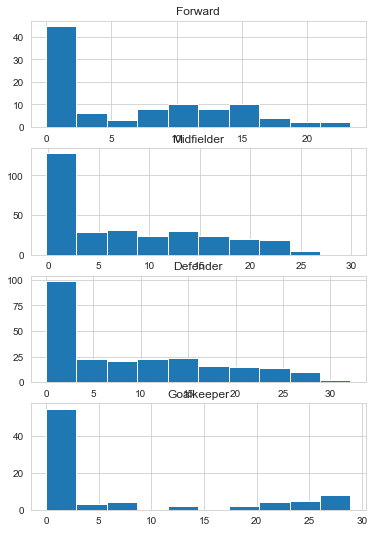

In [68]:
fwd_df = slim_elements_df.loc[slim_elements_df.position == 'Forward']
mid_df = slim_elements_df.loc[slim_elements_df.position == 'Midfielder']
def_df = slim_elements_df.loc[slim_elements_df.position == 'Defender']
goal_df = slim_elements_df.loc[slim_elements_df.position == 'Goalkeeper']

sns.set_style('whitegrid')
fig, ax = plt.subplots(4,1, figsize = (6,9))

ax[0].hist(fwd_df.value)
ax[0].set_title("Forward")

ax[1].hist(mid_df.value)
ax[1].set_title("Midfielder")

ax[2].hist(def_df.value)
ax[2].set_title("Defender")

ax[3].hist(goal_df.value)
ax[3].set_title("Goalkeeper")


In [ ]:
sort_mid_value = mid_df.sort_values('value_season', ascending = False)

sort_mid_value.head(10)

first_name   second_name       team  element_type selected_by_percent  \
526       Saïd      Benrahma   West Ham             3                19.1   
343       Paul         Pogba    Man Utd             3                17.8   
69       Sergi         Canós  Brentford             3                 3.3   
359      Mason     Greenwood    Man Utd             3                11.9   
216  Abdoulaye      Doucouré    Everton             3                 1.4   
112     Alexis  Mac Allister   Brighton             3                 0.6   
108       Yves      Bissouma   Brighton             3                14.6   
530      Pablo       Fornals   West Ham             3                 0.6   
305      Diogo          Jota  Liverpool             3                15.4   
65   Christian      Nørgaard  Brentford             3                 1.3   

     now_cost  minutes threat value_season  now_cost  total_points  \
526        62      174   90.0          3.9        62            24   
343        77      164   85.0          2.6        77            20   
69         55      180   37.0          2.5        55            14   
359        76      180   58.0          2.4        76            18   
216        55      180   53.0          2.2        55            12   
112        55      104   56.0          2.2        55            12   
108        45      180    7.0          2.2        45            10   
530        60      180   45.0          2.2        60            13   
305        76      140   73.0          2.1        76            16   
65         50      180   40.0          2.0        50            10   

       position  value  
526  Midfielder    3.9  
343  Midfielder    2.6  
69   Midfielder    2.5  
359  Midfielder    2.4  
216  Midfielder    2.2  
112  Midfielder    2.2  
108  Midfielder    2.2  
530  Midfielder    2.2  
305  Midfielder    2.1  
65   Midfielder    2.0

In [42]:
goal_df.head(10)

first_name  second_name         team  element_type selected_by_percent  \
0        Bernd         Leno      Arsenal             1                 1.9   
1   Rúnar Alex    Rúnarsson      Arsenal             1                 1.3   
31        Karl         Hein      Arsenal             1                 0.2   
33       Aaron     Ramsdale      Arsenal             1                 0.1   
34         Jed        Steer  Aston Villa             1                 1.2   
36    Emiliano     Martínez  Aston Villa             1                31.3   
68       David  Raya Martin    Brentford             1                 5.0   
80      Ellery     Balcombe    Brentford             1                 0.0   
82      Patrik   Gunnarsson    Brentford             1                 1.5   
91      Álvaro    Fernández    Brentford             1                 0.0   

    now_cost  minutes threat value_season  now_cost  total_points    position  \
0         49      180    0.0          0.6        49             3  Goalkeeper   
1         40        0    0.0          0.0        40             0  Goalkeeper   
31        40        0    0.0          0.0        40             0  Goalkeeper   
33        45        0    0.0          0.0        45             0  Goalkeeper   
34        40        0    0.0          0.0        40             0  Goalkeeper   
36        55      180    0.0          1.3        55             7  Goalkeeper   
68        45      180    0.0          3.1        45            14  Goalkeeper   
80        40        0    0.0          0.0        40             0  Goalkeeper   
82        40        0    0.0          0.0        40             0  Goalkeeper   
91        45        0    0.0          0.0        45             0  Goalkeeper   

    value  
0     0.6  
1     0.0  
31    0.0  
33    0.0  
34    0.0  
36    1.3  
68    3.1  
80    0.0  
82    0.0  
91    0.0

In [33]:
slim_elements_df.to_csv('GW1-2.csv')